In [ ]:
# Install required libraries
!pip install scikit-learn

# Uninstall TensorFlow (if needed) and install a compatible version
!pip uninstall tensorflow -y
!pip install tensorflow==2.15

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting un

Ready...
  RadiusofAction  CreditRating ObjectAbbreviation  \
0       Regional           1.4                ACR   
1          Lokal           3.0                SPF   
2  International           2.8                ACM   
3       Regional           1.8                HGN   
4          Lokal         359.0                A1E   

                          ece_conceptid                       Industry  \
0  FFA22A72-AF5E-EE11-BE6F-6045BD905F04      Other branches - services   
1  5D10B06A-F9C0-EE11-907A-6045BD905445                Ladies' fashion   
2  911FAABB-34AB-EA11-A812-000D3A2109C9  Sporting goods / sports shoes   
3  87462FCF-34AB-EA11-A812-000D3AAA467A                    Supermarket   
4  14AF62F3-33AB-EA11-A812-000D3AAA467A                   Tea / spices   

  statecodenameQuote  TermofLeaseYears  Quotedetail.ece_ida  \
0        Geschlossen               1.0                20300   
1           Gewonnen               1.0                25211   
2        Geschlossen              10.0

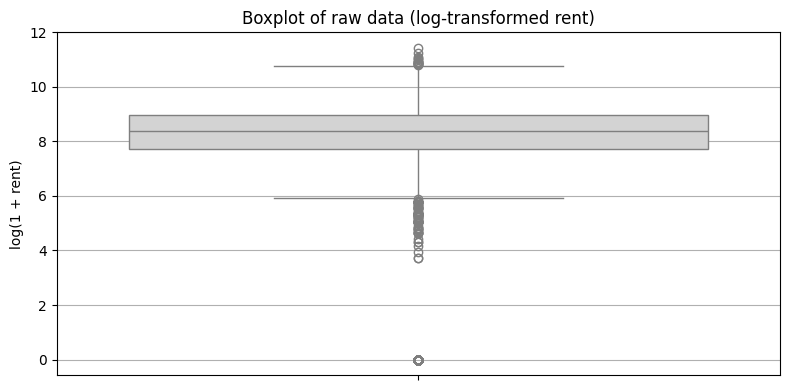

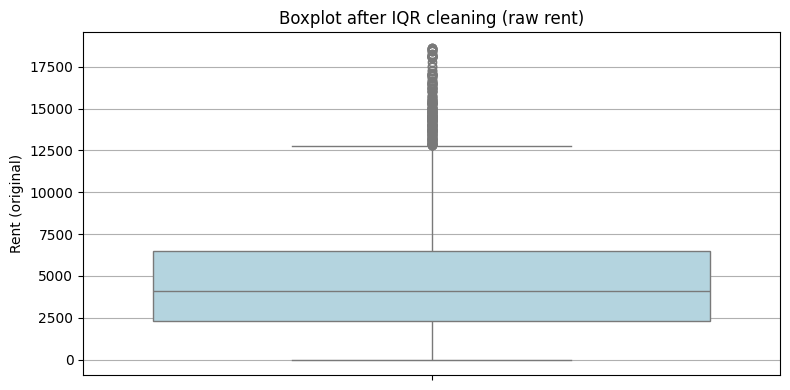

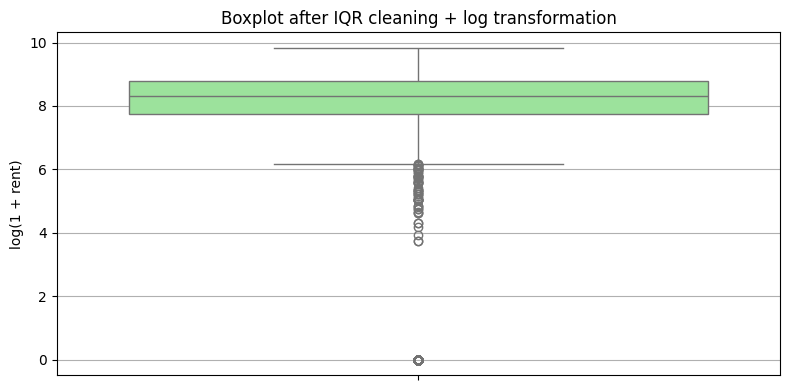

<ipython-input-2-98e8997879be>:130: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[raw_log, ECEtrain["Quotedetail.Mietpreis"].dropna()],


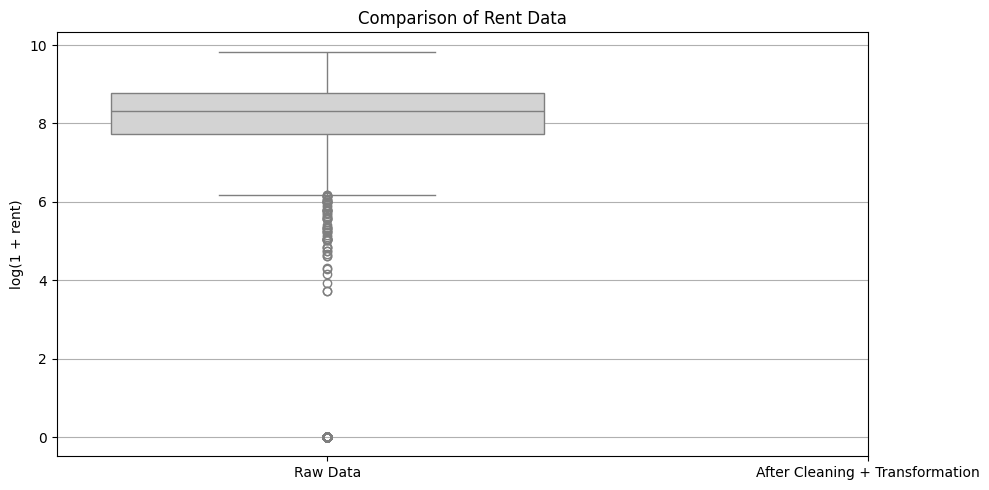

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INF


Train set accuracy: 0.941


Test set accuracy: 0.727



In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler

# Install openpyxl if not already installed (needed for reading Excel files)
!pip install openpyxl

# Print a message indicating the script has started
print("Ready...")

# Define paths to the Excel files for training and test datasets
ECEtrain_path = '/content/Trainingsdatensatz.xlsx'
ECEtest_path = '/content/Testdatensatz.xlsx'

# Read Excel files into pandas DataFrames
ECEtrain = pd.read_excel(ECEtrain_path, header=0)
ECEtest = pd.read_excel(ECEtest_path, header=0)

# Display the first rows of the training dataset
print(ECEtrain.head())

# List of columns containing numeric values that need to be cleaned
columns_to_clean = ['Quotedetail.Mietpreis', 'Quotedetail.SummeNK',
                    'Quotedetail.Heizkosten', 'TurnoverRent',
                    'TermofLeaseYears', 'CreditRating']

# Clean numeric columns in training data (remove currency symbols, spaces, commas)
for column in columns_to_clean:
    ECEtrain[column] = (
        ECEtrain[column]
        .astype(str)
        .str.replace(r'\xa0', '', regex=True)
        .str.replace(r'[^0-9,.-]', '', regex=True)
        .str.replace(',', '.')
        .astype(float)
    )

# Apply same cleaning process to test data
for column in columns_to_clean:
    ECEtest[column] = (
        ECEtest[column]
        .astype(str)
        .str.replace(r'\xa0', '', regex=True)
        .str.replace(r'[^0-9,.-]', '', regex=True)
        .str.replace(',', '.')
        .astype(float)
    )

# Convert target labels to binary values (1 for "Gewonnen", 0 for "Geschlossen")
ECEtrain['statecodenameQuote'] = ECEtrain['statecodenameQuote'].map({'Gewonnen': 1, 'Geschlossen': 0})
ECEtest['statecodenameQuote'] = ECEtest['statecodenameQuote'].map({'Gewonnen': 1, 'Geschlossen': 0})

# Remove target variable from feature set and store it separately
train_y = ECEtrain.pop('statecodenameQuote')
test_y = ECEtest.pop('statecodenameQuote')

# Convert ID field to string (needed for hash-based feature representation)
ECEtrain['Quotedetail.ece_ida'] = ECEtrain['Quotedetail.ece_ida'].astype(str)
ECEtest['Quotedetail.ece_ida'] = ECEtest['Quotedetail.ece_ida'].astype(str)

# Extract and log-transform original rental price column before preprocessing
raw_values = (
    pd.read_excel(ECEtrain_path)["Quotedetail.Mietpreis"]
    .astype(str)
    .str.replace(r"\xa0", "", regex=True)
    .str.replace(r"[^0-9,.-]", "", regex=True)
    .str.replace(",", ".")
    .astype(float)
)
raw_log = np.log1p(raw_values.dropna())

# Visualize original distribution of rental prices using log scale
plt.figure(figsize=(8, 4))
sns.boxplot(y=raw_log, color='lightgray')
plt.title("Boxplot of raw data (log-transformed rent)")
plt.ylabel("log(1 + rent)")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# List of numerical columns to preprocess
NUMERICAL_COLUMNS = [
    "Quotedetail.Mietpreis", "Quotedetail.SummeNK", "Quotedetail.Heizkosten",
    "TermofLeaseYears", 'CreditRating', 'TurnoverRent'
]

# Apply IQR-based filtering to remove outliers from both training and test datasets
for col in NUMERICAL_COLUMNS:
    Q1 = ECEtrain[col].quantile(0.25)
    Q3 = ECEtrain[col].quantile(0.75)
    IQR = Q3 - Q1

    valid_index = (ECEtrain[col] >= Q1 - 2.0 * IQR) & (ECEtrain[col] <= Q3 + 2.0 * IQR)
    ECEtrain = ECEtrain[valid_index]
    train_y = train_y[valid_index]

    valid_index_test = (ECEtest[col] >= Q1 - 2.0 * IQR) & (ECEtest[col] <= Q3 + 2.0 * IQR)
    ECEtest = ECEtest[valid_index_test]
    test_y = test_y[valid_index_test]

# Visualize cleaned raw rental price data before log transform
plt.figure(figsize=(8, 4))
sns.boxplot(y=ECEtrain["Quotedetail.Mietpreis"].dropna(), color='lightblue')
plt.title("Boxplot after IQR cleaning (raw rent)")
plt.ylabel("Rent (original)")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Apply logarithmic transformation to selected skewed columns
for col in ["Quotedetail.Mietpreis", "Quotedetail.SummeNK"]:
    ECEtrain[col] = np.log1p(ECEtrain[col])
    ECEtest[col] = np.log1p(ECEtest[col])

# Visualize final cleaned and log-transformed rental price
plt.figure(figsize=(8, 4))
sns.boxplot(y=ECEtrain["Quotedetail.Mietpreis"].dropna(), color='lightgreen')
plt.title("Boxplot after IQR cleaning + log transformation")
plt.ylabel("log(1 + rent)")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Comparative visualization: raw vs. cleaned and transformed data
plt.figure(figsize=(10, 5))
sns.boxplot(data=[raw_log, ECEtrain["Quotedetail.Mietpreis"].dropna()],
            palette=['lightgray', 'lightgreen'])
plt.xticks([0, 1], ['Raw Data', 'After Cleaning + Transformation'])
plt.title("Comparison of Rent Data")
plt.ylabel("log(1 + rent)")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Define categorical columns and their hash bucket sizes (based on unique value counts)
CATEGORICAL_COLUMNS = {
    'Quotedetail.ece_ida': 8192,
    'Industry': 200,
    'RadiusofAction': 10,
    'ObjectAbbreviation': 200,
    'ece_conceptid': 4096
}

# Create TensorFlow feature columns for embedding categorical features
feature_columns = []
for feature_name, bucket_size in CATEGORICAL_COLUMNS.items():
    categorical_column = tf.feature_column.categorical_column_with_hash_bucket(
        feature_name, hash_bucket_size=bucket_size
    )
    embedding_column = tf.feature_column.embedding_column(categorical_column, dimension=8)
    feature_columns.append(embedding_column)

# Apply robust scaling to features with potential outliers
robust_scaler = RobustScaler()
ECEtrain[['CreditRating', "Quotedetail.Heizkosten", 'TurnoverRent']] = robust_scaler.fit_transform(
    ECEtrain[['CreditRating', "Quotedetail.Heizkosten", 'TurnoverRent']]
)
ECEtest[['CreditRating', "Quotedetail.Heizkosten", 'TurnoverRent']] = robust_scaler.transform(
    ECEtest[['CreditRating', "Quotedetail.Heizkosten", 'TurnoverRent']]
)

# Apply standard scaling to approximately normally distributed features
scaler = StandardScaler()
ECEtrain[['TermofLeaseYears']] = scaler.fit_transform(ECEtrain[['TermofLeaseYears']])
ECEtest[['TermofLeaseYears']] = scaler.transform(ECEtest[['TermofLeaseYears']])

# Add numerical features as TensorFlow numeric columns
for feature_name in NUMERICAL_COLUMNS:
    numeric_column = tf.feature_column.numeric_column(feature_name)
    feature_columns.append(numeric_column)

# Define input function for feeding data into the model
def input_fn(features, labels, training=True, batch_size=100):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    if training:
        dataset = dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size).cache().prefetch(tf.data.experimental.AUTOTUNE)

# Define the deep neural network classifier with 3 hidden layers
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[64, 30, 13],  # Number of neurons in each layer
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
    n_classes=2  # Binary classification: 0 or 1
)

# Set logging level to INFO to monitor training progress
logging.getLogger().setLevel(logging.INFO)
logging.info('Logging system initialized')

# Train the model using the training data and defined input function
classifier.train(
    input_fn=lambda: input_fn(ECEtrain, train_y, training=True),
    steps=5000  # Total number of training steps
)

# Evaluate model performance using the test dataset
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(ECEtest, test_y, training=False)
)

# Optional: Trainingsaccuracy anzeigen
train_eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(ECEtrain, train_y, training=False)
)
print('\nTrain set accuracy: {accuracy:0.3f}\n'.format(**train_eval_result))

# Print the final test accuracy
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp04a6v3tc/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


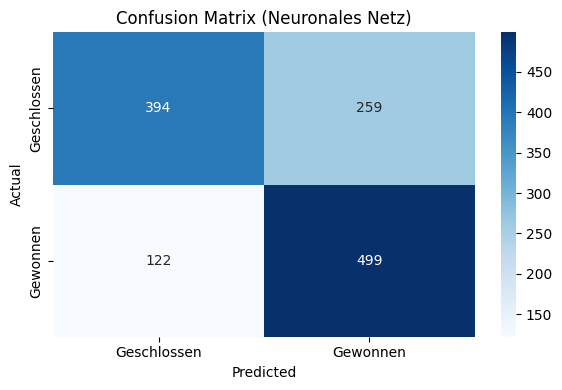

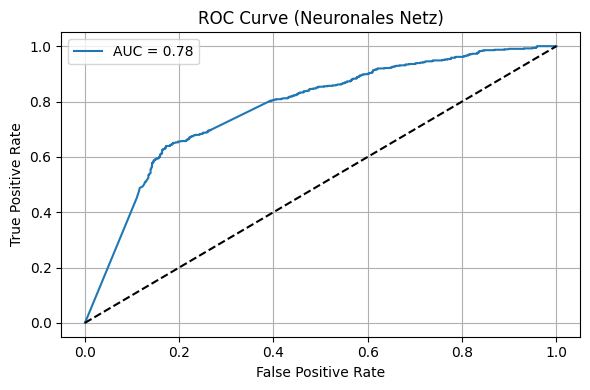

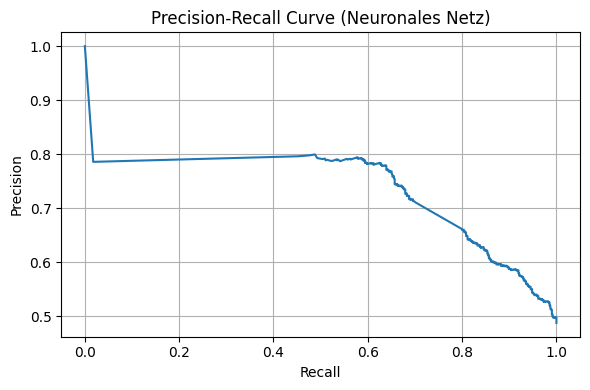

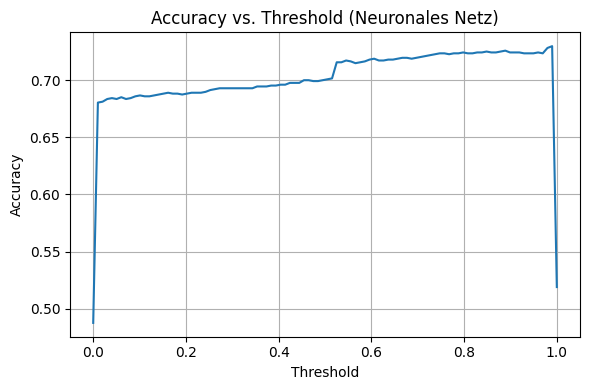

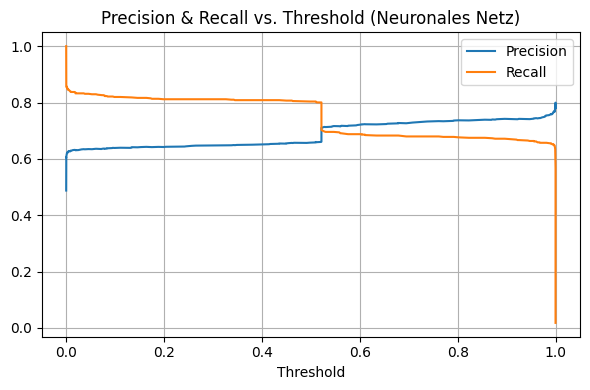

In [ ]:
# Ganz oben einfügen
import tensorflow as tf
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, roc_auc_score

# Der bestehende Code zum Laden, Reinigen, Vorverarbeiten und Trainieren folgt hier...
# (alles bleibt identisch bis nach dem Training des Modells)

# === Nach dem Training und der Evaluation ===

# Vorhersagen auf Testdaten
pred_dicts = list(classifier.predict(input_fn=lambda: input_fn(ECEtest, test_y, training=False)))
probs = np.array([pred['probabilities'][1] for pred in pred_dicts])
y_pred = (probs >= 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Geschlossen", "Gewonnen"], yticklabels=["Geschlossen", "Gewonnen"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neuronales Netz)')
plt.tight_layout()
plt.show()

# ROC Curve + AUC
fpr, tpr, _ = roc_curve(test_y, probs)
roc_auc = roc_auc_score(test_y, probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Neuronales Netz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(test_y, probs)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Neuronales Netz)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy vs. Threshold
thresholds_acc = np.linspace(0, 1, 100)
accuracies = [accuracy_score(test_y, probs >= t) for t in thresholds_acc]
plt.figure(figsize=(6, 4))
plt.plot(thresholds_acc, accuracies)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Threshold (Neuronales Netz)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Precision & Recall vs. Threshold
plt.figure(figsize=(6, 4))
plt.plot(thresholds_pr, precision[:-1], label='Precision')
plt.plot(thresholds_pr, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.title("Precision & Recall vs. Threshold (Neuronales Netz)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print(ECEtrain.head)

<bound method NDFrame.head of      RadiusofAction  CreditRating ObjectAbbreviation  \
0          Regional     -0.545455                ACR   
1             Lokal      0.909091                SPF   
5          National      0.636364                SPF   
6     International     -0.909091                SAC   
8             Lokal      0.818182                ERA   
...             ...           ...                ...   
7198  International      0.000000                TPE   
7199       Regional      0.272727                RNV   
7201          Lokal      0.727273                TGD   
7202          Lokal     -0.545455               SGHN   
7204       National      1.545455                THB   

                             ece_conceptid                         Industry  \
0     FFA22A72-AF5E-EE11-BE6F-6045BD905F04        Other branches - services   
1     5D10B06A-F9C0-EE11-907A-6045BD905445                  Ladies' fashion   
5     71C53FA9-0AC7-ED11-B597-6045BD905B5E     snacks - othe